# Classification

So far, we have only dealt with regression problems. However, supervised learning involves two main groups of tasks - regression tasks and classification tasks.

While for regression problems the output of the model is a continuous value (float or integer), in classification tasks, the output of the model is a class indicator/group in which the object belongs.

We will start with a small dataset with fish to not spend much time on data cleaning and preprocessing.

If we want to predict the species of fish (Perch - *perch*, Roach - *roach*, Pike - *pike*, ...), it is a prediction of a categorical value, ie. a classification.

Classification problems have slightly different properties and logic than regression problems, so there are models directly designed for such problems. They are called classifiers.
But first we will try to look at the task of classification from the perspective of data.

![data](static\ryby.png)

In [1]:
# load the data
import pandas as pd 
import numpy as np 
np.random.seed(2020) # random classifier settings
data = pd.read_csv("static/fish_data.csv", index_col=0)
data

,Species,Weight,Length1,Length2,Length3,Height,Width,ID
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,2
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,3
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,4
...,...,...,...,...,...,...,...,...
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484,153
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,154
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,155
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,156


### Approach 1:   
The most common species of fish is *Perch*. Our goal is to create a classifier that returns information for specified measures (weight, different lengths and widths), whether it is a perch or another species. 

So for simplicity, we only have two classes, **Perch** and **other**.

This is called binary classification problem - usually dealing with problems is something is `True` or `False`

## Classification models

There are lots of classification models, approaching the problem from different perspective. You can check them out more on youtube, documentation or discuss with us after the lesson. 

Today we will speak about two of them - logistic regression and K-Neighbors Classifier:
+ [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)  

+ [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

+ [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
    
+ [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
   - n_estimators, integer, optional (default=100)
   
+ [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
     - C, float, optional (default=1.0)
     - kernelstring, optional (default=’rbf’)
     



### Logistic regression

used for separation between two categories and it is coming from family of regression functions (like the name suggest)
--> `binary classifier`


#### Maximum likelihood Estimation

     
The MLE is a "likelihood" maximization method, while OLS is a distance-minimizing approximation method. Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.

Ordinary Least squares estimates are computed by fitting a regression line on given data points that has the minimum sum of the squared deviations (least square error). Both are used to estimate the parameters of a linear regression model. MLE assumes a joint probability mass function, while OLS doesn't require any stochastic assumptions for minimizing distance.
          

Datacamp website - https://www.datacamp.com/tutorial/understanding-logistic-regression-python

Sigmoid function

Sigmoid is a mathematical function that takes any real number and maps it to a probability between 1 and 0.
![data](static/sigmoid.png)

![data](static/sigmoid2.png)

Suppose we have two possible outcomes, true and false, and have set the threshold as `0.5`. A probability less than 0.5 would be mapped to the outcome `false`, and a probability greater than or equal to 0.5 would be mapped to the outcome `true`.

### K nearest neighbours

- non-parametric algorithm (non-parametric means without specific distribution or without specified parameters of distribution being known)

- if k is 1, new object is simply assign to nearest class
- if k is bigger than 1, new object is assigned to class by majority vote

![data](static/knn.png)

### Decision tree

![data](static/Decision-tree-for-the-Weather-dataset.png)

- root node
- decision node
- terminal node

goal is to find best structure (in simplest case) using entropy and information gain

Entropy is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information.

Information gain can be defined as the amount of information gained about a random variable or signal from observing another random variable. It can be considered as the difference between the entropy of parent node and weighted average entropy of child nodes.

recommended reading: https://medium.datadriveninvestor.com/decision-tree-algorithm-with-hands-on-example-e6c2afb40d38

### How to fit a model:
#### Choose one model and try to train it for fish data.

In [2]:
# let's prepare the data
y = data["Species"] == "Perch"
y = y.astype(int)
X = data.drop(columns=["ID", "Species"])

In [3]:
# let's take a classifier# you can change
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(max_iter=500)

In [4]:
# let's divide into a training and validation set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [5]:
# train
modelLR.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [6]:
# Evaluate the validation set
pred = modelLR.predict(X_test) 

In [7]:
print ("Real class: Prediction:")
for true, predicted in zip(y_test, pred):
    print(f"{true:<15}  {predicted:<10} {'OK' if true == predicted else 'X'}")

print(f"Number of errors: {sum(y_test != pred)}")    

Real class: Prediction:
0                0          OK
0                0          OK
0                0          OK
0                0          OK
0                0          OK
0                0          OK
1                1          OK
0                0          OK
1                1          OK
0                0          OK
0                0          OK
1                1          OK
0                0          OK
1                1          OK
0                0          OK
1                1          OK
0                0          OK
0                0          OK
0                0          OK
1                1          OK
0                0          OK
0                0          OK
0                0          OK
0                0          OK
0                0          OK
1                1          OK
1                1          OK
1                1          OK
1                1          OK
1                1          OK
0                0          OK
Number of error

### Metrics


It is probably clear that regression metrics are not very suitable for classification problems. What would you use as a metric for the classification task?

### Naive approach:
- One option is to compare the percentage of successfully classified patterns. In our case, it will be:

In [8]:
print (f"Success: {100*sum(y_test == pred)/len(y_test):.2f} %")

Success: 100.00 %


### Another model, same procedure

In [9]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


modelDT.fit(X_train, y_train)

predDT = modelDT.predict(X_test) 


print (f"Success: {100*sum(y_test == predDT)/len(y_test):.2f} %")

Success: 70.97 %


Success is not entirely bad, knowing the type of fish by size is not an easy task.
But imagine that we have a data set with 100 fish, 95 of which will be perch (Perch type). Will a classifier with this success rate (the same as we came out) feel good or not? Why?

#### So it is time to dive into metrics

To illustrate the metrics directly with an example, let's leave fish for a moment and let's have a look at well-known Iris dataset.This is a classification of (American) iris flowers. The dataset was compiled in the 1930s by statistician and biologist Ronald Fisher (see [wiki](https://en.wikipedia.org/wiki/Iris_flower_data_set)).The set contains three classes: setosa, versicolor and virginica.
![iris_data](static\iris_data.png)

In the figure, you see a pairplot showing the dependencies between the flag pairs (input variables) and the resulting class. The color of the dot corresponds to the class to which the iris belongs. You can see, for example, that the red class *setosa* can be determined by the size of the petal.
![iris_pairplot](static\iris_pairplot.jpg)

The aim of the task is to create a model - classifier, which for the given values of sepal and petal leaves will return the correct classification of the sample in the class. As a classifier, let's choose a decision tree, ie *DecisionTreeClassifier*. (It is one of the most well-known classifiers, popular mainly due to its speed and ease of interpretation. You can read more about it at [wiki](https://en.wikipedia.org/wiki/Decision_tree)). So we will be interested how we can measure the success of our classifier.

(This time we do not read the data from the file, but use the pre-prepared data from the datasets module of the scikit-learn library).

In [10]:
# We only have this here so that all calculations are the same# random generator settings
import numpy as np
np.random.seed(42)

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris () # load data, Iris data is "built-in"
X = iris.data # flags
y = iris.target # classes (labels)

# Lets divide the data into training and testing
# random_state determines the initialization of the random number generator (we want it to always work the same way for us)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=314)

# lets create a classifier
classifier = DecisionTreeClassifier(random_state=314)
# we train and evaluate the test set
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Lets see what the predictions look like.

In [12]:

print(f"{'Flags:':^25} {'Predicted class:':^25} {'Real class:':^25}")
print("_" * 92)
for flags, class_pred, class_real in zip(X_test, y_pred, y_test):
    result_str = "OK" if class_pred == class_real else ":(" 
    print(f"{str(flags):^25} {class_pred:^25} {class_real:^25} {result_str:^25}")

         Flags:               Predicted class:             Real class:       
____________________________________________________________________________________________
    [5.2 4.1 1.5 0.1]                 0                         0                        OK            
    [5.8 2.7 5.1 1.9]                 2                         2                        OK            
    [4.8 3.  1.4 0.1]                 0                         0                        OK            
    [4.7 3.2 1.3 0.2]                 0                         0                        OK            
    [6.3 2.3 4.4 1.3]                 1                         1                        OK            
    [5.7 2.8 4.5 1.3]                 1                         1                        OK            
    [5.8 2.8 5.1 2.4]                 2                         2                        OK            
    [5.1 3.3 1.7 0.5]                 0                         0                        OK          

The simplest thing we can measure is the percentage of correct answers. This is called **accuracy**.

In [13]:
100*((y_pred == y_test).sum()/len(y_test))

90.0

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9

#### Task:
Imagine you have to classify apples and pears. You have a dataset containing 100 pieces of fruit. The classifier on this set achieves a success rate of 90% (90 pieces are classified correctly). 
Do you think that the classifier is good?

**Accuracy** gives us very little information. Lets reveal now that there were 90 pieces of apples and 10 pieces of pears. A classifier which classifies everything as an apple, would mean it has a 90% success rate on this set - accuracy. But it is useless to us.

C:\Users\krike\Desktop\pyladies_vienna\pyladies_vienna_data_course\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


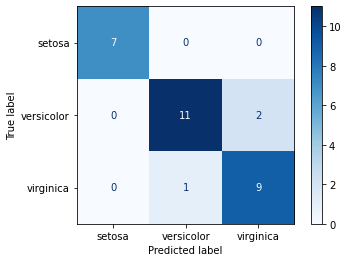

In [15]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

plot_confusion_matrix(classifier, # learned classifier
                       X_test, y_test,   # data 
                       display_labels = iris.target_names, # class names [can be omitted]
                       cmap = plt.cm.Blues # color palette [can be omitted]
)


The **confusion matrix** gives us much more information. On the picture above, we can see, how many samples from the class given by the row were classified into the class given by the column.

So in our case: One case of the Virginica type was incorrectly classified as Versicolor, two cases of the Versicolor type were incorrectly classified as Virginica.

We will now look at binary classification (classification into two classes). Consider the *breast_cancer* dataset that contains positive and negative cancer findings.

In order to compare different solutions (models), we take two different classifiers, firstly SVC (*Support Vector Machine* classifier - for more information, see [wiki](https://en.wikipedia.org/wiki/Support_vector_machines)) and secondly the so-called *Dummy* classifier, which serves only as a baseline and implements a trivial solution.

In [16]:
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

# we load the data and divide it into training and testing
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# we create and train classifier
sclassifier = SVC (random_state = 0, probability = True)
sclassifier.fit (X_train, y_train)
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

# we will classify test samples
y_pred = sclassifier.predict(X_test)
y_dummy = dummy.predict(X_test)

# print accuracy
print("SVC accuracy ", accuracy_score(y_test, y_pred))
print("dummy accuracy ", accuracy_score(y_test, y_dummy))

SVC accuracy  0.9370629370629371
dummy accuracy  0.6293706293706294


C:\Users\krike\Desktop\pyladies_vienna\pyladies_vienna_data_course\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


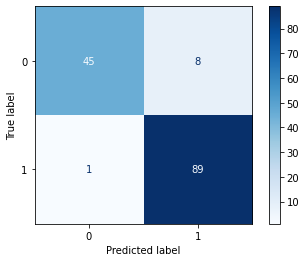

In [17]:
plot_confusion_matrix(sclassifier, X_test, y_test, cmap=plt.cm.Blues);

We can call class 0 negative, class 1 positive. 
One positive sample was marked negative, such cases are called **false negative**. Eight negative samples were marked as positive, these are the so-called **false positive** cases.

The numbers of false positive and false negative cases are crucial for evaluating the success of a binary classification. We classify correctly classified samples as **true positive** and **true negative**.


## Precision, recall, F1 score

The classification metric known as **precision** tells you how many samples marked as positive are really positive.
![precision](static\precision.png)

TP indicates the number of correctly marked positive samples (**true positives**)<br>FP indicates the number of **false positives**


The **recall** metric tells you how many positive samples were captured by the classifier (classified as positive).
![recall](static\recall.png)

FN is the number of **false negatives**

Think about what these formulas tell us. The image above and the following example from [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall) will help you with this.


Imagine you have a computer program for recognizing dogs in photos. You have a picture of 12 dogs and several cats. The program will find 8 dogs in the photo. Five of these 8 dogs are really dogs (**true positive**), but the other two are actually cats (**false positive**).

**Precision** of the program is 5/8 (0.625), while **recall** is 5/12 (approx. 0.417). **Precision** can be interpreted as a measure of the usefulness of the result, **recall** says how complete the result is (how many dogs we wanted to find and we really found).

In [18]:
from sklearn.metrics import precision_score, recall_score

print("Precision: ", precision_score(y_test, y_pred))
print("Recall:    ", recall_score(y_test, y_pred))

Precision:  0.9175257731958762
Recall:     0.9888888888888889


In [19]:
print("Precision: ", precision_score(y_test, y_dummy))
print("Recall:    ", recall_score(y_test, y_dummy))

Precision:  0.6293706293706294
Recall:     1.0


Whether precision or recall is more important to us depends on the specific task. Sometimes there are more false positives (too many relevant emails marked as spam), in other cases an undetected positive case (undetected occurrence of the disease) will be more pressing matter.

Another frequently used metric is the so-called F1 score. It combines precision and recall, so that both of these metrics have the same weight (they contribute equally to the result). The higher the value, the better the result. The maximum value is one, the minimum is 0.

![F1](static/f1.png)

In [20]:
from sklearn.metrics import f1_score

print ("F1 score SVC:", f1_score (y_test, y_pred))
print("F1 score Dummy: ", f1_score(y_test, y_dummy))

F1 score SVC: 0.9518716577540107
F1 score Dummy:  0.7725321888412017


## ROC curve

Another useful characteristic is the so-called ROC curve ([wiki](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)). The curve expresses the quality of the binary classifier depending one the classification threshold.

What is a classification threshold? 
Imagine that in a `breast cancer` task, the learned model will not return the values 0/1 (negative, positive finding), but a `float` number indicating the probability (or some degree) of belonging to the positive class.

In the simplest case, you will classify samples with a probability greater than 0.5 as positive, others as negative. However, you may want to be careful and examine patients who have a worse finding, although not so bad that the model gives a response greater than 0.5. Then this threshold will not be 0.5, but eg. 0.4.

You can be a supporter of the "do not scare them" approach, and you decide to examine only patients with a really bad finding. The threshold would be moved to 0.7, for example. What approach should be taken depends on the specific situation.

The ROC curve shows the relationship between the probability of detection (**true positive rate** or sensitivity, recall) TPR and the probability of false alarm (**false positive rate**) FPR.
![roc](static/roc.png)

P, N ... are the numbers of all positive / negative samples

The ROC curve shows the probability of a false alarm on the x-axis and the probability of detection on the y-axis. This for all classification thresholds. The higher the classification threshold, the lower the probability of a false alarm and the lower the sensitivity. The lower the classification threshold, the greater the probability of detection (sensitivity) and the greater the risk of false alarms.

C:\Users\krike\Desktop\pyladies_vienna\pyladies_vienna_data_course\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\krike\Desktop\pyladies_vienna\pyladies_vienna_data_course\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


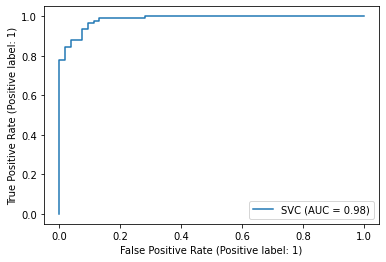

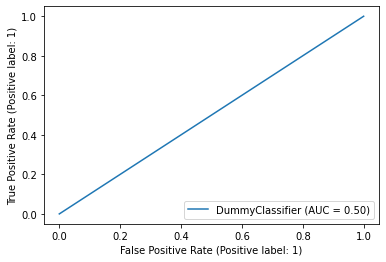

In [23]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(sclassifier, X_test, y_test)
plot_roc_curve(dummy, X_test, y_test)

The AUC (Area Under the Curve) value indicates the area under the ROC curve. 
#### The larger the area, the better the classifier!

### So final example to wrap it up:

Choose a metric for our task and try to find the best classifier possible. Then load the test set and see what your classifier gives the results.

In [ ]:
# load test data
test_data = pd.read_csv("static/fish_data_test.csv", index_col=0)
y_real_test = test_data["Species"] == "Perch"
y_real_test = y_real_test.astype(int)
X_real_test = test_data.drop(columns=["ID", "Species"])

In [ ]:
# try to learn different models and choose the best one
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# try to learn different models and choose the best one
models = {
    "nearest neighbors": KNeighborsClassifier(),
    "tree": DecisionTreeClassifier(),
    "forest": RandomForestClassifier(),
    "svc": SVC()
}
...

In [ ]:
# prediction
# model = models[...]
test_pred = model.predict(X_real_test)

In [ ]:
# try adding the selected metric
print(f"Real class: Prediction:")
for true, predicted in zip(y_real_test, test_pred):
    print(f"{true:<15}  {predicted:<10} {'OK' if true == predicted else 'X'}")

print(f"Number of errors: {sum(y_real_test != test_pred)}")
print(f"Success: {100*sum(y_real_test == test_pred)/len(y_real_test):.2f} %")
